# STOIIP & Recoverable Resources Calculation

MONTE CARLO SIMULATION FOR OIL-INITIALLY-IN-PLACE (OOIP) & RECOVERABLE RESOURCES

In [23]:
# Import libraries
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## A.  Geometric Correction Factor (g)

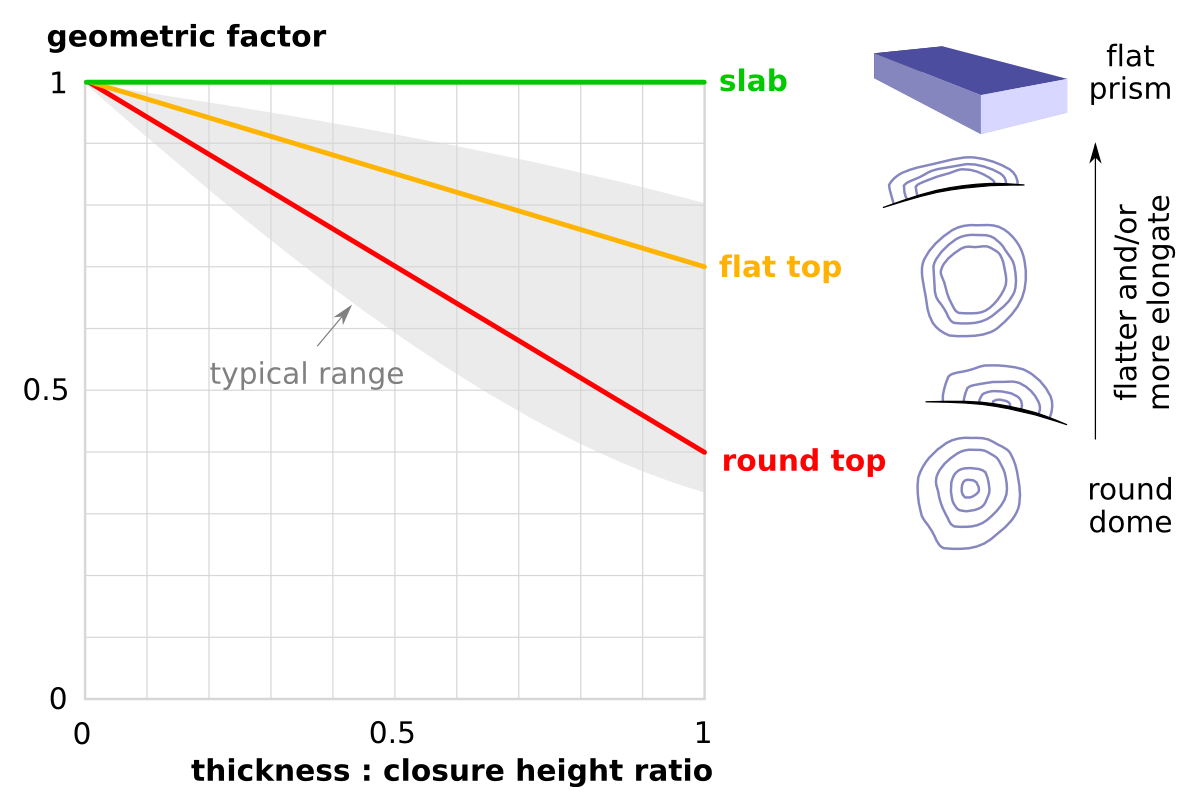

In [24]:
# Display an image file illustrating the Geometric Correction Factor
from IPython import display
display.Image("http://subsurfwiki.org/images/6/66/Geometric_correction_factor.png", width=600)

In [25]:
# Geometric_Correction_Factor calculation based on reservoir thickness and closure height of prospect

thick = 80                    # reservoir thickness
height = 100                  # closure height
ratio = thick / height        # ranges form 0.4 to 1.0

# Define shape of prospect feature; 'flat', 'round' otherwise it's a slab of 1
top = 'flat'

if top == 'round':
    g = -0.6 * ratio + 1
elif top == 'flat':
    g = -0.3 * ratio + 1
else:
    g = 1

print("The Geometric Correction_Factor =", g)

The Geometric Correction_Factor = 0.76


## B. Key Inputs 

In [5]:
# Input Variables
seed = 121                   # seed point - use RANDOM STATE
bins = 50                    # number of bins
m3_to_bbl_conversion = 6.28981
n = 100000                   # number of samples

#1. AREA (meters^2)          TRIANGULAR DISTRIBUTION
a_min = 4100000                # scalar - Lower bound of the distribution support
a_max = 4250000                 # scalar - Upper bound of the distribution support
c = 0.5                      # scalar - The location of the triangle's peak 

#2. THICKNESS (meters)      TRIANGULAR DISTRIBUTION
t_min = 70                   # scalar - Lower bound of the distribution support
t_max = 110                  # scalar - Upper bound of the distribution support 
c = 0.5                      # scalar - The location of the triangle's peak 

#3. NET-TO-GROSS (NTG)      TRIANGULAR DISTRIBUTION
ntg_min = 0.50               # scalar - Lower bound of the distribution support
ntg_max = 0.70               # scalar - Upper bound of the distribution support 
c = 0.5                      # scalar - The location of the triangle's peak

#4. POROSITY                 NORMAL DISTRIBUTION
por_mean = 0.14              # Mean
por_std = 0.042              # Standard Deviation

#5. WATER SATURATION         NORMAL DISTRIBUTION
sw_mean = 0.25               # Mean
sw_std = 0.103               # Standard Deviation

#6. OIL FORMATION VOLUME FACTOR (Bo)   UNIFORM DISTRIBUTION
bo_min = 1.03                # scalar - Lower bound of the distribution support
bo_max = 1.06                # scalar - Upper bound of the distribution support

#7. RECOVERY FACTOR (RF)     TRIANGULAR DISTRIBUTION
rf_min = 0.15                # scalar - Lower bound of the distribution support
rf_max = 0.35                # scalar - Upper bound of the distribution support 
c = 0.5                      # scalar - The location of the triangle's peak)

#8. Geometric Correction Factor (g)   UNIFORM DISTRIBUTION
g_min = g                    # scalar - Lower bound of the distribution support
g_max = g+0.04               # scalar - Upper bound of the distribution support 

## C.  Probability Distribution

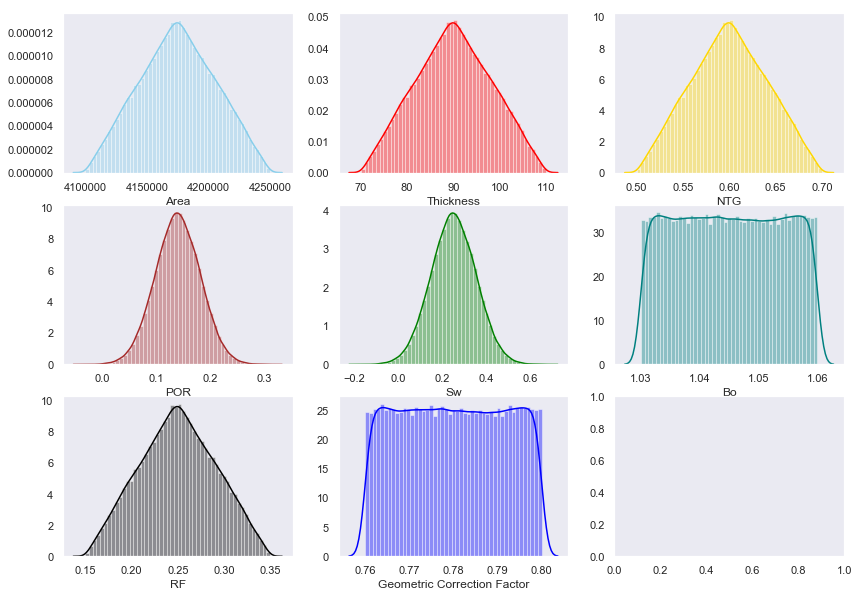

In [28]:
Area = stats.triang.rvs(c, loc=a_min, scale=a_max-a_min, size=n, random_state = seed)
Thickness = stats.triang.rvs(c, loc=t_min, scale=t_max-t_min, size=n, random_state = seed)
NTG = stats.triang.rvs(c, loc=ntg_min, scale=ntg_max-ntg_min, size=n, random_state=seed)
POR = stats.norm(por_mean, por_std).rvs(size = n, random_state=seed) 
Sw = stats.norm(sw_mean, sw_std).rvs(size = n, random_state=seed) 
Bo = stats.uniform.rvs(loc = bo_min, scale=bo_max-bo_min, size=n, random_state = seed)
RF = stats.triang.rvs(c, loc=rf_min, scale=rf_max-rf_min, size=n, random_state=seed)
g = stats.uniform.rvs(loc = g_min, scale=g_max-g_min, size=n, random_state = seed)


# Plot Proabability Distributions
sns.set_style("dark")
f, axes = plt.subplots(3, 3, figsize=(14, 10), )

# plt.title('SciPy Probablity Distributions')
sns.distplot( Area , color="skyblue", ax=axes[0, 0], axlabel='Area')
sns.distplot( Thickness , color="red", ax=axes[0, 1], axlabel='Thickness')
sns.distplot( NTG , color="gold", ax=axes[0, 2], axlabel='NTG')
sns.distplot( POR , color="brown", ax=axes[1, 0], axlabel='POR')
sns.distplot( Sw , color="green", ax=axes[1, 1], axlabel='Sw')
sns.distplot( Bo , color="teal", ax=axes[1, 2], axlabel='Bo')
sns.distplot( RF , color="black", ax=axes[2, 0], axlabel='RF')
sns.distplot( g , color="blue", ax=axes[2, 1], axlabel='Geometric Correction Factor')
plt.show()

## D. STOIIP & Recoverable Resources Calculations 

In [32]:
GRV = g * Area * Thickness                                    # GRV is in cubic meters
NRV = GRV * NTG                                               # NRV is in cubic meters
HCPV = NRV * POR * (1-Sw)                                     # HCPV is in cubic meters
OIIP_m3 = (GRV * NTG* POR * (1-Sw)) / Bo                      # OIIP is in cubic meters
OIIP = (GRV*NTG*POR*(1-Sw)*m3_to_bbl_conversion/1E6) / Bo     # OIIP is in mmbbls
Recoverable_Resources_m3 = OIIP_m3 * RF
Recoverable_Resources_mmbbl = OIIP * RF

# Statistics
print("The minimum OIIP = %.1f mmbbls" % (min(OIIP)))
print("The maximum OIIP = %.1f mmbbls" % (max(OIIP)))
print ("The std OIIP = %.1f mmbbls" % np.std(OIIP))
print("P99 OIIP = %.1f mmbbls" % (np.percentile(OIIP, 1))) 
print("P90 OIIP = %.1f mmbbls" % (np.percentile(OIIP, 10))) 
print("P50 OIIP = %.1f mmbbls" % (np.percentile(OIIP, 50))) 
print("P10 OIIP = %.1f mmbbls" % (np.percentile(OIIP, 90))) 
print("P01 OIIP = %.1f mmbbls" % (np.percentile(OIIP, 99)))

The minimum OIIP = -45.3 mmbbls
The maximum OIIP = 188.7 mmbbls
The std OIIP = 26.9 mmbbls
P99 OIIP = 41.1 mmbbls
P90 OIIP = 73.9 mmbbls
P50 OIIP = 107.4 mmbbls
P10 OIIP = 142.3 mmbbls
P01 OIIP = 167.4 mmbbls


## E. Cumulative Distribution Function (CDF)

### Using histograms to plot a cumulative distribution

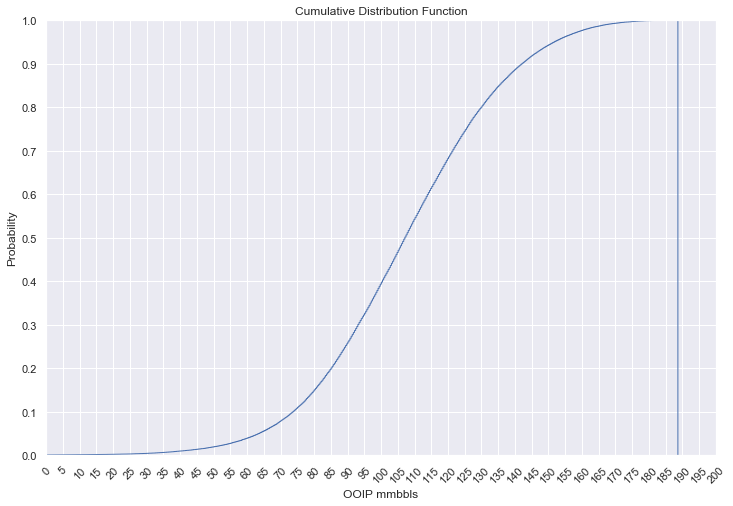

In [35]:
# PLot Cumulative Distribution Function
fig = plt.figure(figsize=(12,8))
plt.ylabel('Probability')
plt.xlabel('OOIP mmbbls')
plt.title('Cumulative Distribution Function')
plt.xlim(0,200)
plt.xticks(rotation=45)
plt.ylim(0.0,1.0)
plt.locator_params(axis='x', nbins=40)
plt.locator_params(axis='y', nbins=10)
plt.grid(True)

# Plot the data
plt.hist(OIIP, bins=700, density=True, cumulative=True, histtype='step')
plt.show()

## F. Probability Distribution Function (PDF)

### Using Gaussian KDE

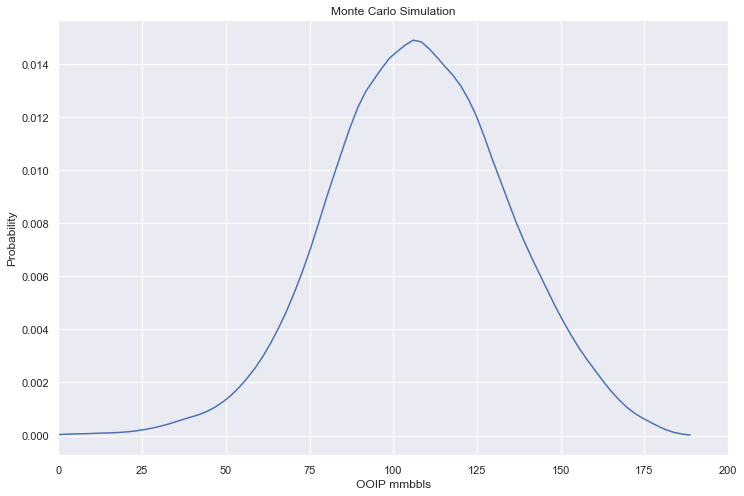

In [38]:
# Import libraries
from scipy.stats.kde import gaussian_kde
from numpy import linspace

# Set data variable
data = OIIP

# This create the kernel, given an array it will estimate the probability over that values
kde = gaussian_kde(data)

# These are the values over which the kernel will be evaluated
dist_space = linspace( min(data), max(data), 100 )

# Plot the results
fig = plt.figure(figsize=(12,8))
plt.plot(dist_space, kde(dist_space))
plt.ylabel('Probability')
plt.xlabel('OOIP mmbbls')
plt.xlim(0, 200)
plt.title('Monte Carlo Simulation')
plt.grid(True)
plt.show()

### Using Numpy Histogram

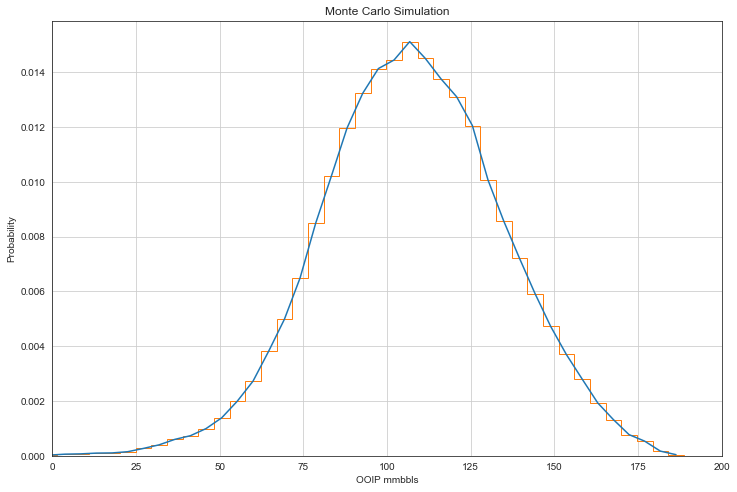

In [20]:
fig = plt.figure(figsize=(12,8))
hist, bins = np.histogram(OIIP, bins=50, density=True)
bin_centers = (bins[1:]+bins[:-1])*0.5
plt.plot(bin_centers, hist)
plt.hist(OIIP, bins=50, density=True, histtype='step')
plt.xlim(0,200)
# plt.ylim(0.0,1.0)
plt.ylabel('Probability')
plt.xlabel('OOIP mmbbls')
plt.title('Monte Carlo Simulation')
plt.grid(True)

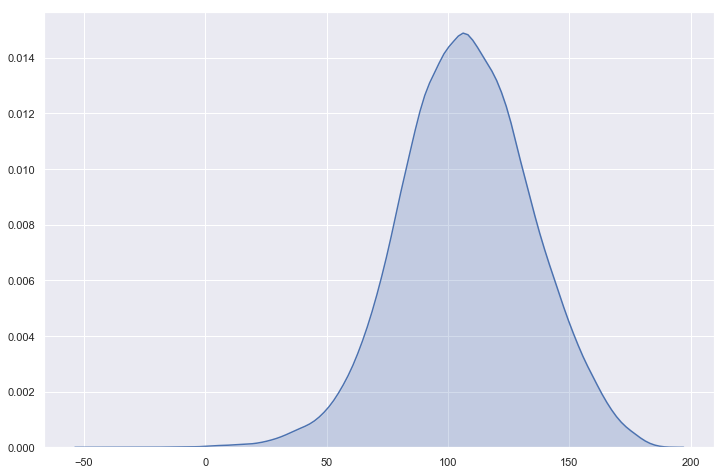

In [22]:
import seaborn as sns; sns.set(color_codes=True)
fig = plt.figure(figsize=(12,8))
ax=sns.kdeplot(OIIP, shade=True)
plt.show()